### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
fraud_check=pd.read_csv('Fraud_check_Rf.csv')

In [3]:
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Data Understanding

In [4]:
fraud_check.shape

(600, 6)

In [5]:
fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
fraud_check.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud_check['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [8]:
fraud_check['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [9]:
fraud_check['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [10]:
fraud_check['Taxable.Income'].describe().round(2)

count      600.00
mean     55208.38
std      26204.83
min      10003.00
25%      32871.50
50%      55074.50
75%      78611.75
max      99619.00
Name: Taxable.Income, dtype: float64

### Data Handling

#### Converting as Categorical Datatype

In [11]:
fraud_check['Undergrad']=fraud_check['Undergrad'].astype('category')

In [12]:
fraud_check['Marital.Status']=fraud_check['Marital.Status'].astype('category')

In [13]:
fraud_check['Urban']=fraud_check['Urban'].astype('category')

In [14]:
fraud_check['Fraud']=fraud_check['Taxable.Income'].map(lambda x: 'Risky' if x<=30000 else 'Good')
#Considering if Taxable income is less than 30,000 Fraud check is Risky, else he is good

In [15]:
fraud_check['Fraud']=fraud_check['Fraud'].astype('category')

In [16]:
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [17]:
fraud_check['Fraud'].value_counts()

Good     476
Risky    124
Name: Fraud, dtype: int64

In [18]:
fraud_check.dtypes

Undergrad          category
Marital.Status     category
Taxable.Income        int64
City.Population       int64
Work.Experience       int64
Urban              category
Fraud              category
dtype: object

#### Label Encoding to convert categorical data into numeric

In [19]:
fraud_check['Undergrad']=fraud_check['Undergrad'].cat.codes

In [20]:
fraud_check['Marital.Status']=fraud_check['Marital.Status'].cat.codes

In [21]:
fraud_check['Urban']=fraud_check['Urban'].cat.codes

In [22]:
fraud_check['Fraud']=fraud_check['Fraud'].cat.codes

In [23]:
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [24]:
fraud_check.dtypes

Undergrad           int8
Marital.Status      int8
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban               int8
Fraud               int8
dtype: object

### Data Visualization

#### BOX Plots

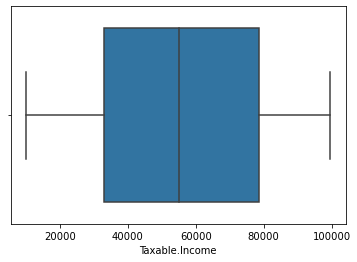

In [25]:
sns.boxplot(x=fraud_check['Taxable.Income'])
plt.show()

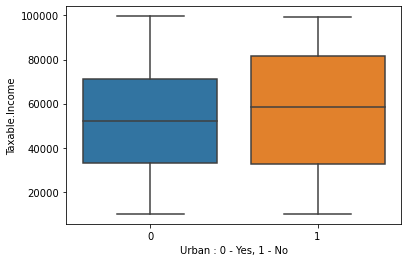

In [26]:
sns.boxplot(y=fraud_check['Taxable.Income'],x=fraud_check['Urban'])
plt.xlabel("Urban : 0 - Yes, 1 - No")
plt.show()

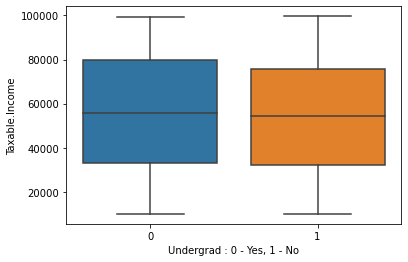

In [27]:
sns.boxplot(y=fraud_check['Taxable.Income'],x=fraud_check['Undergrad'])
plt.xlabel("Undergrad : 0 - Yes, 1 - No")
plt.show()

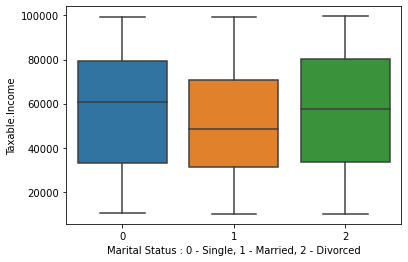

In [28]:
sns.boxplot(y=fraud_check['Taxable.Income'],x=fraud_check['Marital.Status'])
plt.xlabel("Marital Status : 0 - Single, 1 - Married, 2 - Divorced")
plt.show()

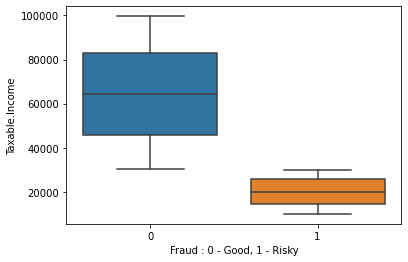

In [29]:
sns.boxplot(y=fraud_check['Taxable.Income'],x=fraud_check['Fraud'])
plt.xlabel("Fraud : 0 - Good, 1 - Risky")
plt.show()

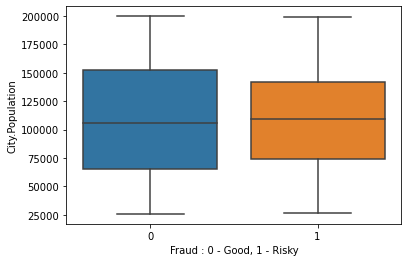

In [30]:
sns.boxplot(y=fraud_check['City.Population'],x=fraud_check['Fraud'])
plt.xlabel("Fraud : 0 - Good, 1 - Risky")
plt.show()

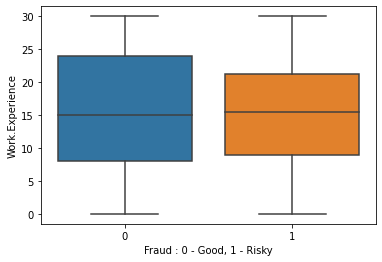

In [31]:
sns.boxplot(y=fraud_check['Work.Experience'],x=fraud_check['Fraud'])
plt.xlabel("Fraud : 0 - Good, 1 - Risky")
plt.show()

#### Scatter Plots

#### Distplots

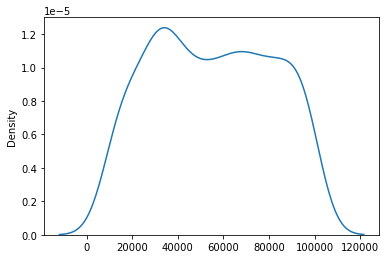

In [32]:
sns.distplot(x=fraud_check['Taxable.Income'],hist=False)
plt.show()

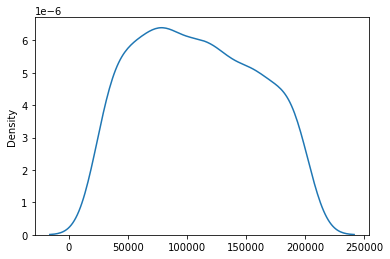

In [33]:
sns.distplot(x=fraud_check['City.Population'],hist=False)
plt.show()

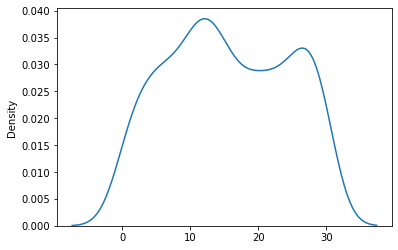

In [34]:
sns.distplot(x=fraud_check['Work.Experience'],hist=False)
plt.show()

#### Correlation Data || Heat Map || Pair Plot

In [35]:
corr=fraud_check.corr().round(3)
corr

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
Undergrad,1.000,0.042,-0.049,0.080,-0.005,-0.000,0.013
Marital.Status,0.042,1.000,-0.013,-0.002,-0.002,0.065,0.006
Taxable.Income,-0.049,-0.013,1.000,-0.064,-0.002,0.071,-0.689
City.Population,0.080,-0.002,-0.064,1.000,0.013,-0.040,0.012
Work.Experience,-0.005,-0.002,-0.002,0.013,1.000,-0.095,-0.002
Urban,-0.000,0.065,0.071,-0.040,-0.095,1.000,0.005
Fraud,0.013,0.006,-0.689,0.012,-0.002,0.005,1.000


In [36]:
np.fill_diagonal(corr.values,0)
corr

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
Undergrad,0.000,0.042,-0.049,0.080,-0.005,-0.000,0.013
Marital.Status,0.042,0.000,-0.013,-0.002,-0.002,0.065,0.006
Taxable.Income,-0.049,-0.013,0.000,-0.064,-0.002,0.071,-0.689
City.Population,0.080,-0.002,-0.064,0.000,0.013,-0.040,0.012
Work.Experience,-0.005,-0.002,-0.002,0.013,0.000,-0.095,-0.002
Urban,-0.000,0.065,0.071,-0.040,-0.095,0.000,0.005
Fraud,0.013,0.006,-0.689,0.012,-0.002,0.005,0.000


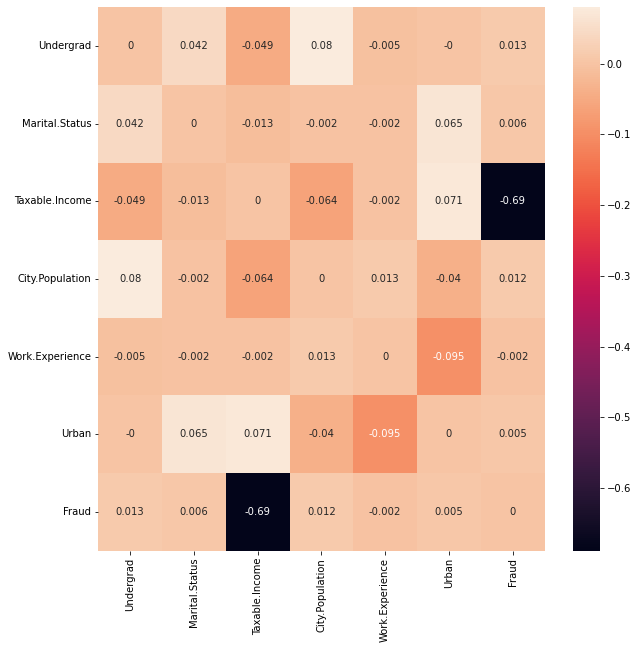

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

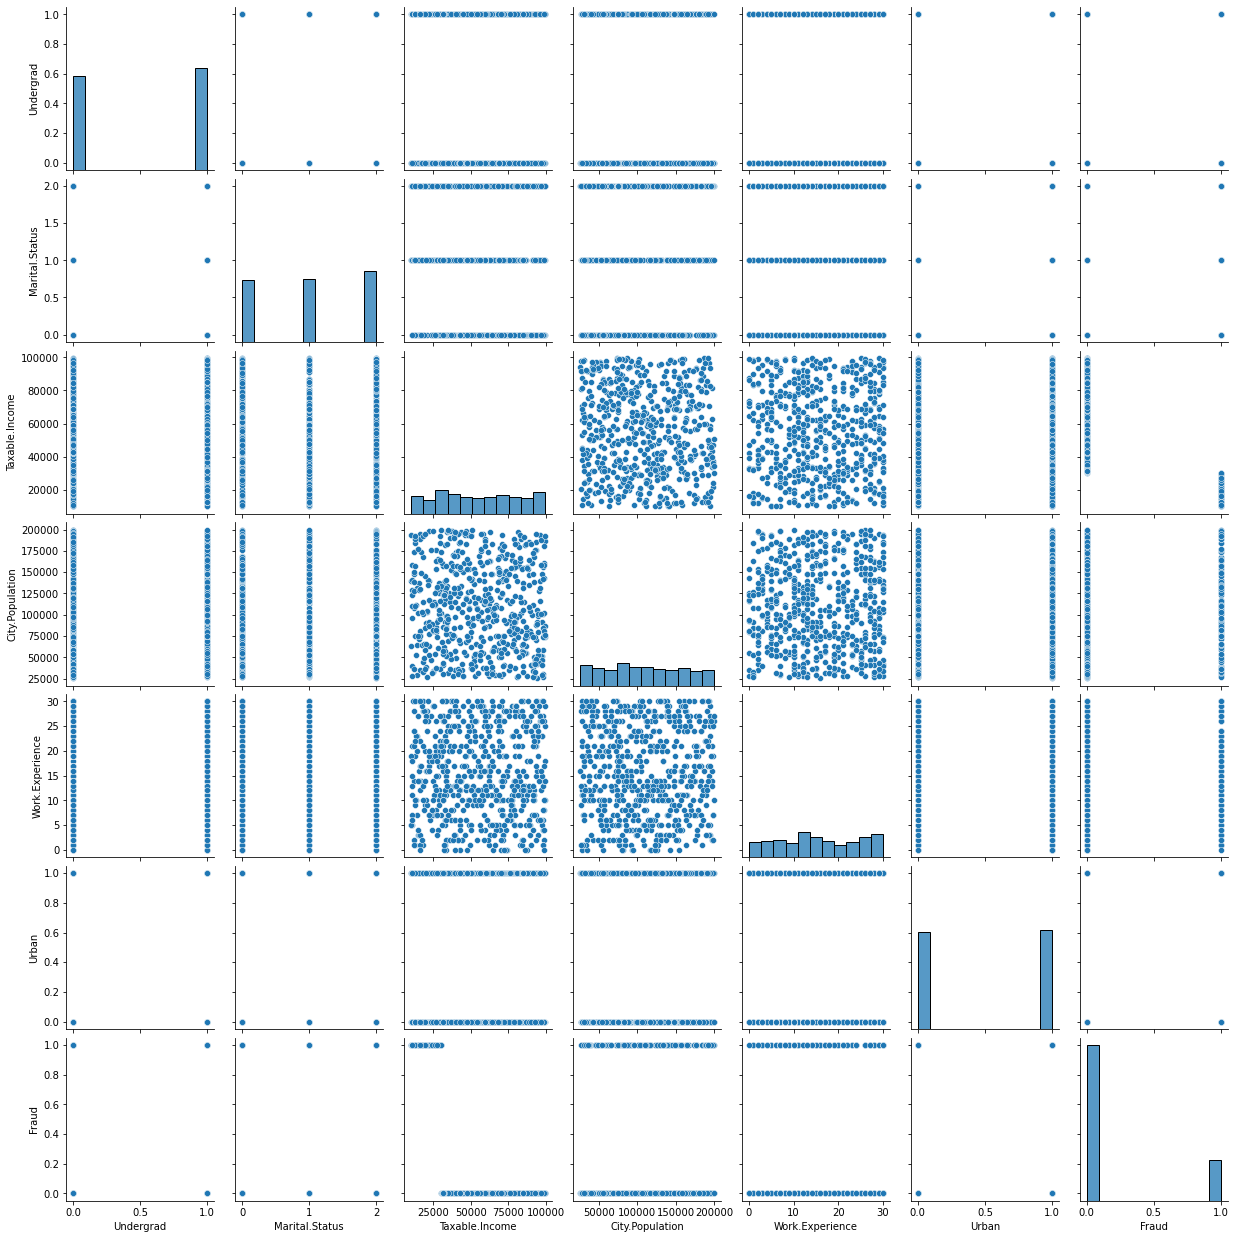

In [38]:
sns.pairplot(fraud_check)
plt.show()

### Model Building

In [39]:
X=fraud_check.drop(['Fraud'],axis=1)

In [40]:
y=fraud_check[['Fraud']]

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

### Model Training

In [42]:
rf_classifier=RandomForestClassifier(criterion='gini',max_depth=3,random_state=True)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=True)

In [43]:
dt_classifier=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=True)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=True)

In [44]:
gridsearchcv=GridSearchCV(estimator=rf_classifier,
                          param_grid={'criterion':['gini','entropy'],'max_depth': [3,4,5,6,7,8,9]},
                          cv=5)
gridsearchcv.fit(X,y)

print(gridsearchcv.best_params_)
print(gridsearchcv.best_score_)

{'criterion': 'gini', 'max_depth': 3}
1.0


In [45]:
gridsearchcv=GridSearchCV(estimator=dt_classifier,
                          param_grid={'criterion':['gini','entropy'],'max_depth': [3,4,5,6,7,8,9]},
                          cv=5)
gridsearchcv.fit(X,y)

print(gridsearchcv.best_params_)
print(gridsearchcv.best_score_)

{'criterion': 'gini', 'max_depth': 3}
0.9983333333333334


### Model Testing

In [46]:
y_pred_train=rf_classifier.predict(X_train)

In [47]:
print(accuracy_score(y_train,y_pred_train))

1.0


In [48]:
print(confusion_matrix(y_train,y_pred_train))

[[369   0]
 [  0 111]]


In [49]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [50]:
y_pred_test=rf_classifier.predict(X_test)

In [51]:
print(accuracy_score(y_test,y_pred_test))

1.0


In [52]:
print(confusion_matrix(y_test,y_pred_test))

[[107   0]
 [  0  13]]


In [53]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        13

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



Roc Auc Score : 1.0


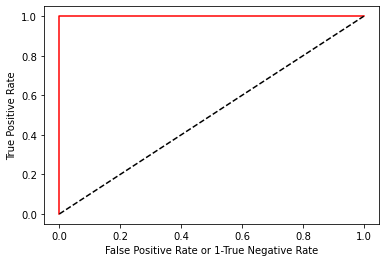

In [54]:
fpr,tpr,thresholds = roc_curve(y_train,y_pred_train)
score=roc_auc_score(y_train,y_pred_train)
print("Roc Auc Score :",score)

plt.plot(fpr, tpr, color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate or 1-True Negative Rate")
plt.ylabel("True Positive Rate")
plt.show()

Roc Auc Score : 1.0


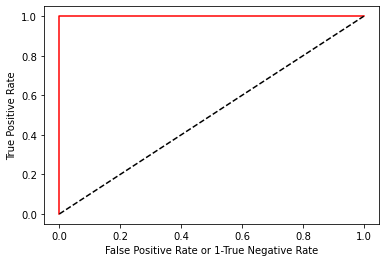

In [55]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_test)
score=roc_auc_score(y_test,y_pred_test)
print("Roc Auc Score :",score)

plt.plot(fpr, tpr, color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate or 1-True Negative Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Model Evaluation between Decision Tree Classifier and Random Forest Classifier

In [56]:
kfold=KFold(n_splits=10)

In [57]:
#Decision Tree
score=cross_val_score(estimator=dt_classifier,X=X,y=y,cv=kfold)
mean_score=np.mean(score)
mean_score

0.9983333333333334

In [58]:
#Random Forest
score=cross_val_score(estimator=rf_classifier,X=X,y=y,cv=kfold)
mean_score=np.mean(score)
mean_score

0.9983333333333334

### End !!!